In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
red_wine=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
print(red_wine.shape)
red_wine["wine_quality"]=red_wine['quality'].apply(lambda x: 'low' if x <= 5 else 'medium' if x <=7
else 'high')
red_wine['wine_quality']= pd.Categorical(red_wine['wine_quality'], categories=['low','medium','high'])
red_wine

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,low
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,low
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,medium
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,low
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,medium
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,medium
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,low


array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>,
        <AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>],
       [<AxesSubplot:title={'center':'free sulfur dioxide'}>,
        <AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'sulphates'}>],
       [<AxesSubplot:title={'center':'alcohol'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

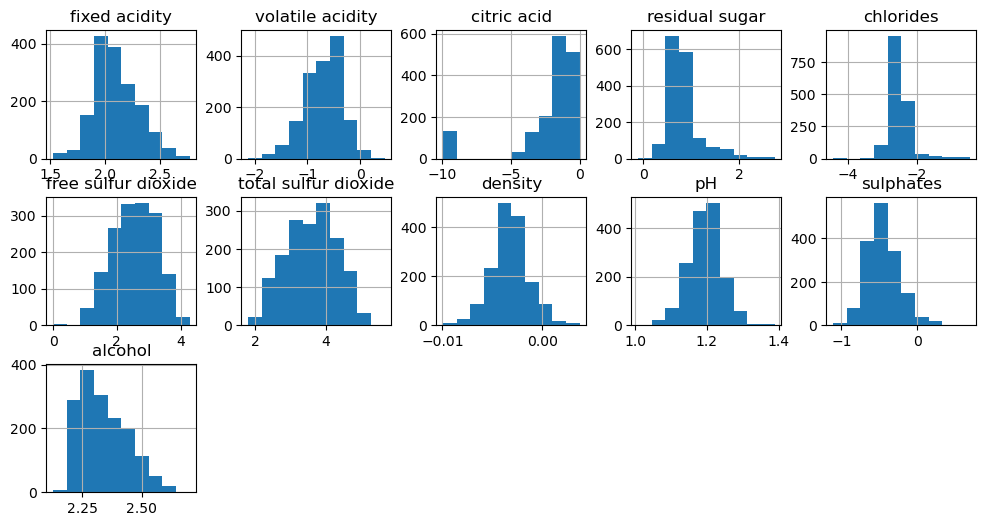

In [3]:
red_wine_t=np.log((red_wine[red_wine.columns[:-2]])+0.00005)
red_wine_t["wine_quality"]=red_wine["wine_quality"]
red_wine_t.hist(figsize=(12,6),layout=(3,5))

In [4]:
red_wine_t['wine_quality']=np.where(red_wine_t['wine_quality']=='high', 2,red_wine_t['wine_quality'] )
red_wine_t['wine_quality']=np.where(red_wine_t['wine_quality']=='medium', 1,red_wine_t['wine_quality'] )
red_wine_t['wine_quality']=np.where(red_wine_t['wine_quality']=='low', 0,red_wine_t['wine_quality'] )
red_wine_t['wine_quality']=red_wine_t['wine_quality'].astype('int32')
red_wine_t['wine_quality'].value_counts()

1    837
0    744
2     18
Name: wine_quality, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
x, y=red_wine_t[red_wine_t.columns[:-2]], red_wine_t[red_wine_t.columns[-1]]
x=np.array(x)
y=np.array(y)
X_train,X_test,y_train,y_test=train_test_split(x,y, test_size=0.3,shuffle=True, random_state=42,stratify=y) 

In [6]:
from sklearn.ensemble import  RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier as Xgb
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier as LighGB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import BorderlineSMOTE, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import matthews_corrcoef, f1_score, confusion_matrix, make_scorer, balanced_accuracy_score,accuracy_score
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_validate, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import learning_curve
from sklearnex import patch_sklearn 
from pandas import MultiIndex, Int64Index
patch_sklearn()


m5 = RandomForestClassifier(random_state=1)
sm = SMOTE(random_state=42)
X_train_r0, y_train_r0 = sm.fit_resample(X_train, y_train) 
rm = RandomUnderSampler(random_state=42)
X_train_r, y_train_r = rm.fit_resample(X_train_r0, y_train_r0) 

re=RFE(estimator=m5, n_features_to_select= 10)

mm=re.fit(X_train_r,y_train_r)


mm.score(X_train_r,y_train_r)
pr=mm.predict(X_test)
print(confusion_matrix(pr,y_test))
print(balanced_accuracy_score(pr,y_test))
print(mm.score(X_train_r,y_train_r))
print(mm.score(X_test,y_test))
print(accuracy_score(pr,y_test))




/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/var/folders/nm/btrww2_94pncl34mb0yt49j80000gn/T/ipykernel_91976/4220250864.py:23: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


[[173  51   0]
 [ 49 192   5]
 [  1   8   1]]
0.5509364111498258
1.0
0.7625
0.7625


In [7]:
# Plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
        
    x1 = np.linspace(0, 10, 8, endpoint=True) produces
        8 evenly spaced points in the range 0 to 10
    """
    
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

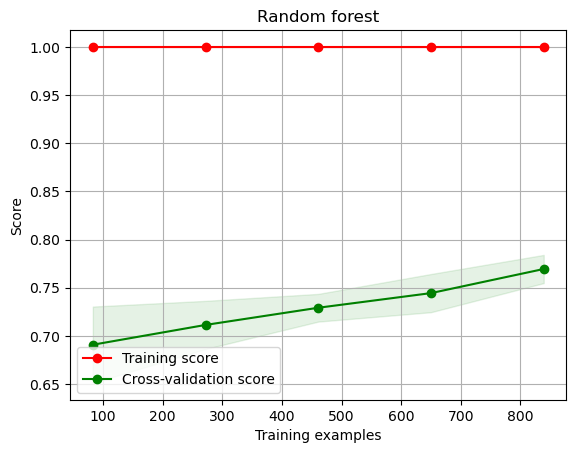

In [8]:

plot_learning_curve(estimator = m5,title = ("Random forest"),
                X = X_train, y = y_train, cv = 4)

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, mm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77       223
           1       0.78      0.76      0.77       251
           2       0.10      0.17      0.12         6

    accuracy                           0.76       480
   macro avg       0.55      0.57      0.56       480
weighted avg       0.77      0.76      0.77       480



Precision , recall, ... are better than those with nested cross validation. However, as learning curve shows the model is overfitted and has low score when it is generalised.